In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# dtype = torch.float
# #device = torch.device("cpu")
# device = torch.device("cuda:0")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
import NeuralNetwork as NN
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress

importlib.reload(NN)
importlib.reload(Layer);

In [39]:
net = NN.NeuralNetwork()
l = Layer.InputPELayer(n=2)
net.AddLayer(l)
#net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))

In [40]:
net.SetIdentityWeights()
net.M[0] += torch.normal( mean=torch.zeros_like(net.M[0]) )/2.

In [2552]:
net.learn = False
net.learn_weights = False
net.learn_biases = False

In [41]:
net.learn = True
net.learn_weights = True
net.learn_biases = True

In [2467]:
net.Integrate()
net.layers[1].dbdt
net.Step(dt=0.001)
net.ShowState()

Layer 0 (input):
  v = [1. 1.]
  e = [0.001 0.001]
Layer 1:
  v = [0. 0.]
  e = [-0.01523188 -0.01523188]
Layer 2 (expectation):
  v = [1. 1.]


In [42]:
net.ShowBias()

  b = [0. 0.]
  b = [0. 0.]
  b = [0. 0.]


In [43]:
net.ShowWeights()

  W01 = 
[[1. 0.]
 [0. 1.]]
  M10 = 
[[ 1.2983912  -0.33726144]
 [ 0.2572285   0.69654655]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]


In [46]:
net.ShowBias()
net.ShowWeights()

  b = [-0.01280356 -0.01292179]
  b = [0. 0.]
  b = [0. 0.]
  W01 = 
[[ 1.1220119   0.11670309]
 [-0.10650403  0.89927566]]
  M10 = 
[[ 1.1220119  -0.10650403]
 [ 0.11670309  0.89927566]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]


In [45]:
epochs = 200
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 4
start_time = time.time()
for k in range(epochs):
    x = np.random.rand()*0.25 - 0.125
    y = np.random.rand()*0.25 - 0.125
    net.SetInput([x,y])
    net.SetExpectation([x,y])
    #print(k, x,y)
    net.Run(T, dt=0.001)
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

A Jupyter Widget

Total time: 164.3874433040619


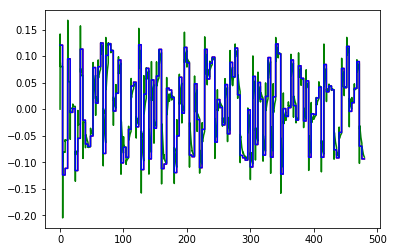

In [32]:
plt.plot(np.array(net.t_history), np.array(net.layers[0].v_history)[:,0], 'r',
         np.array(net.t_history), np.array(net.layers[1].v_history)[:,0], 'g',
         np.array(net.t_history), np.array(net.layers[2].v_history)[:,0], 'b');

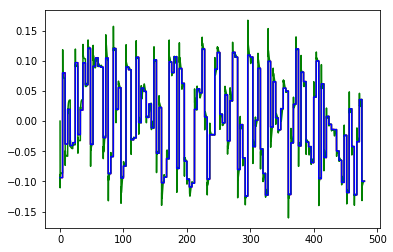

In [33]:
plt.plot(np.array(net.t_history), np.array(net.layers[0].v_history)[:,1], 'r',
         np.array(net.t_history), np.array(net.layers[1].v_history)[:,1], 'g',
         np.array(net.t_history), np.array(net.layers[2].v_history)[:,1], 'b');

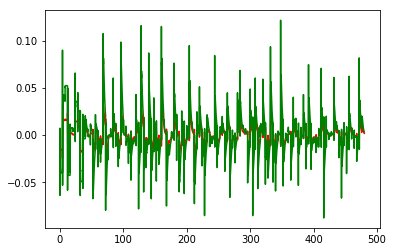

In [34]:
plt.plot(np.array(net.t_history), np.array(net.layers[0].e_history)[:,0], 'r',
         np.array(net.t_history), np.array(net.layers[1].e_history)[:,0], 'g');

In [28]:
net.ShowBias()
net.ShowWeights()

  b = [-0.09677703  0.07803462]
  b = [0. 0.]
  b = [0. 0.]
  W01 = 
[[ 1.7689822  -0.5132186 ]
 [ 0.15507025  0.80765   ]]
  M10 = 
[[ 1.7689822   0.15507025]
 [-0.5132186   0.80765   ]]
  W12 = 
[[1. 0.]
 [0. 1.]]
  M21 = 
[[1. 0.]
 [0. 1.]]


In [2200]:
net.Run(T, dt=dt)
net.ShowState()
net.ShowBias()

Layer 0 (input):
  v = [-0.0263164  -0.12291998]
  e = [ 0.8955212  -0.07549984]
Layer 1:
  v = [ 0.83824813 -0.93213785]
  e = [ 0.8645034  -0.80978113]
Layer 2 (expectation):
  v = [-0.0263164  -0.12291998]
  b = [0. 0.]
  b = [0. 0.]
  b = [0. 0.]


In [2224]:
plt.plot(np.array(net.t_history), np.array(net.layers[0].e_history)[:,0],
         np.array(net.t_history), np.array(net.layers[1].e_history)[:,0],
         np.array(net.t_history), np.array(net.layers[2].e_history)[:,0]);

IndexError: too many indices for array

In [2366]:
net.ShowBias()

  b = [ 0.0127156  -0.02489228]
  b = [ 0.00908295 -0.00367596]
  b = [0. 0.]


In [2611]:
net.M[0]@np.tanh(net.layers[1].v)

tensor([ 0.1070, -0.0691])

In [2608]:
net.layers[1].v

tensor([ 0.1271, -0.1071])

In [2609]:
net.layers[0].v

tensor([ 0.1188, -0.0919])

In [2607]:
net.ShowState()

Layer 0 (input):
  v = [ 0.11879075 -0.0918722 ]
  e = [ 0.01169252 -0.02259705]
Layer 1:
  v = [ 0.12709437 -0.10711867]
  e = [ 0.00885549 -0.01549719]
Layer 2 (expectation):
  v = [ 0.11879075 -0.0918722 ]
